In [6]:
from dataset import ChestCocoDetection
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [7]:
train = ChestCocoDetection(root="D:\\Siim\\siim-covid19-detection", ann_file="D:\\Siim\\siim-covid19-detection\\labels.json", training=True)
test = ChestCocoDetection(root="D:\\Siim\\siim-covid19-detection", ann_file="D:\\Siim\\siim-covid19-detection\\labels.json", training=False)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [8]:
found = False
while not found:
    idx = np.random.randint(len(train))
    train_img = train.__getitem__(idx)
    test_img = test.__getitem__(idx)
    found = len(train_img[1]['boxes']) > 0

dict_keys(['image', 'bboxes', 'category_ids'])
Original boxes:[[2713.14521  518.92069 3975.4809  2408.04123]
 [ 955.51797  330.44698 2016.23074 1996.0288 ]]
Transformed boxes:[(0.0, 93.19387113028473, 201.3880289813298, 510.4629464020707), (318.26330203734034, 51.56378505608283, 496.1489680183426, 419.4576124245039)]
tensor([84033.0000, 65443.0391])
dict_keys(['image', 'bboxes', 'category_ids'])
Original boxes:[[2713.14521  518.92069 3975.4809  2408.04123]
 [ 955.51797  330.44698 2016.23074 1996.0288 ]]
Transformed boxes:[(326.3934087218045, 76.17184440366972, 478.2533413533835, 353.4739420183486), (114.9495302255639, 48.50597871559633, 242.5540739849624, 292.9950532110092)]
tensor([42111.0781, 31197.9160])


In [9]:
def add_bounding_boxes(target, ax):
    boxes = target['boxes']
    for box in boxes:
        mp_box = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], edgecolor="r", facecolor='none')
        ax.add_patch(mp_box)

def show_samples_for(test, train):
    print(test[1])
    fig, axs = plt.subplots(1, 2, figsize=(10,8))
    #fig.suptitle(f'Study: {samples["id"].iloc[i]}')
    for im_i, (img, data) in enumerate([test, train]):
        ax = axs[im_i] if isinstance(axs, np.ndarray) else axs
        ax.set_title(f'Instance / Image Nr. {im_i + 1} / {2}')
        #dcm = pydicom.dcmread(image_path)
        plt.figure()
        ax.imshow(img.permute(1,2,0), cmap=plt.cm.bone)
        add_bounding_boxes(data, ax)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'image_id': tensor([5683]), 'boxes': tensor([[326.3934,  76.1718, 478.2533, 353.4739],
        [114.9495,  48.5060, 242.5541, 292.9951]]), 'area': tensor([42111.0781, 31197.9160]), 'labels': tensor([1, 1])}


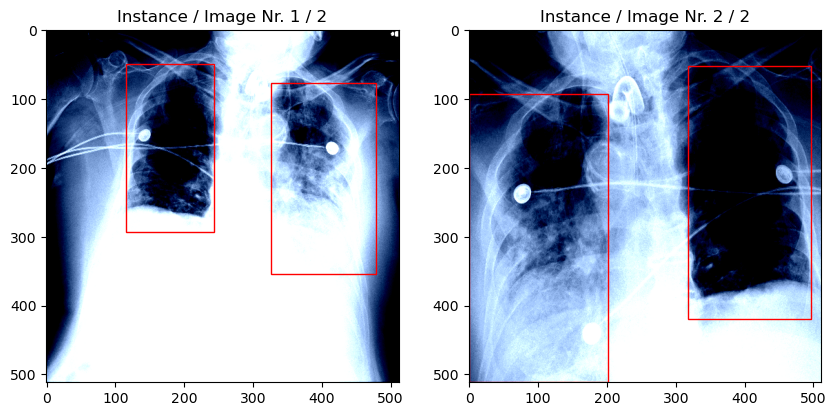

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
show_samples_for(test_img, train_img)